In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비


In [2]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# '?'를 np.nan으로 변경
# horsepower 열의 자료형 변경 (문자열->숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype('float')

In [5]:
# 결측치 평균으로 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [6]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg','cylinders','horsepower','weight']]

In [7]:
# ndf 데이터를 train data와 test daa로 구분 (7:3 비율)
X = ndf[['weight']] # 독립변수
y = ndf[['mpg']] # 종속변수

In [8]:
# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('훈련 데이터:',X_train.shape)
print('검증 데이터:',X_test.shape)

훈련 데이터: (278, 1)
검증 데이터: (120, 1)


# 모델 학습 및 검증

In [9]:
# sklibrary에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # 다항식 변환

print('원본데이터:',X_train.shape)
print('2차항 변환 데이터:', X_train_poly.shape)

원본데이터: (278, 1)
2차항 변환 데이터: (278, 3)


In [11]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변환
r_square = pr.score(X_test_poly,y_test)
print('결정계수:',r_square)

결정계수: 0.7255470154175803


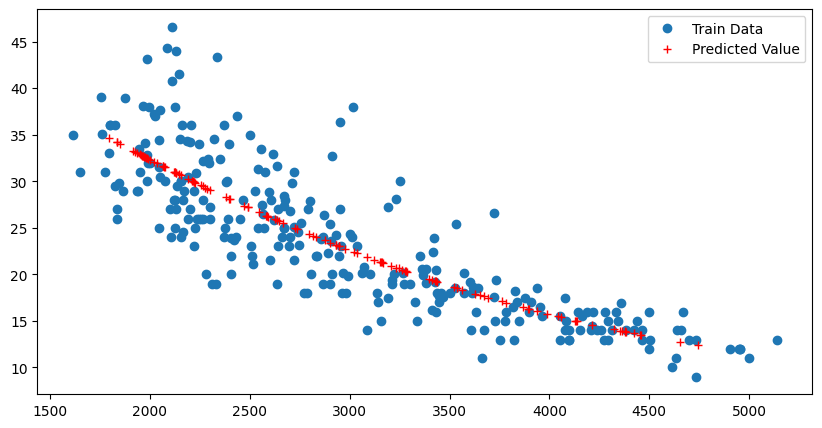

In [12]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig, axes = plt.subplots(figsize=(10,5))
axes.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
axes.plot(X_test,y_hat_test,'r+',label='Predicted Value') # 모형이 학습한 회귀선
axes.legend(loc='best')
plt.xlabel=('weight')
plt.ylabel=('mpg')
plt.show()

In [14]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat_test를 실제 값 y_test와 비교
x_poly = poly.fit_transform(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat_test
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test']) ** 2

# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse:', mse)

mse: 15.813520500520452


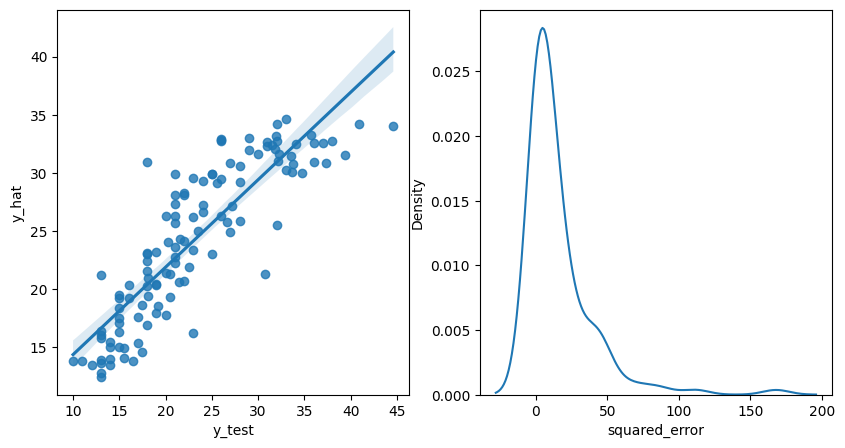

In [15]:
# 오차 분석
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);